In [147]:
import Pkg; Pkg.add("Plots")
using Plots


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


## Битовый график

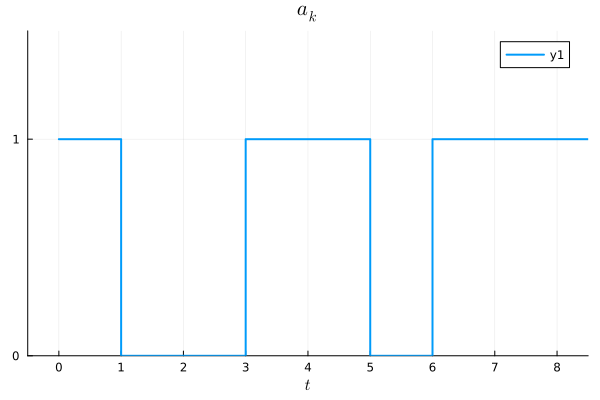

In [157]:
using Plots

bits = [1, 0, 0, 1, 1, 0, 1, 1, 1]

time = []
values = []

for (i, bit) in enumerate(bits)
    append!(time, [i-1, i])
    append!(values, [bit, bit])
end

p1 = plot(time,
     values, 
     linewidth=2, 
     line=:steppost, 
     xlabel="\$t\$", 
     title="\$a_k\$", 
     xlims=(-0.5, length(bits)-0.5), 
     ylims=(0.0, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=0:1)

# savefig(p1, "../report/pics/bits.svg")

plot!(p1)


## Значения для синусоид

In [149]:
bits_r = []

function reverse(val)
    if val == 1
        0
    else
        1
    end
end

for (i, bit) in enumerate(bits)
    if i == 1 
        append!(bits_r, 1)
    else
        if bit == 0
            append!(bits_r, bits_r[i-1])
        else
            append!(bits_r, reverse(bits_r[i-1]))
        end
    end
end

bits = bits_r

9-element Vector{Any}:
 1
 1
 1
 0
 1
 1
 0
 1
 0

## Синусоидальный график

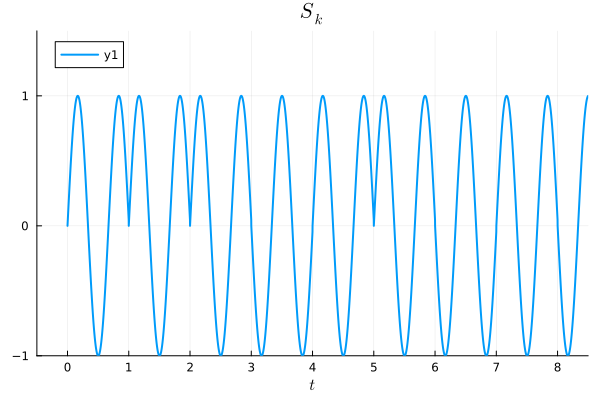

In [150]:
using Plots

# Создаем массив битов (1 и 0)
# bits = [1, 1, 1, 0, 1, 1, 0, 1, 0]

sample_rate = 1000
bit_duration = 1 
num_samples_per_bit = Int(sample_rate * bit_duration)

half_period = 0.67
t = range(0, stop=bit_duration, length=num_samples_per_bit)
sinusoid = sin.(2π * t / half_period)
reverse_sinusoid = -sinusoid

signal = Float64[]

for bit in bits
    if bit == 1
        append!(signal, sinusoid)
    else
        append!(signal, reverse_sinusoid)
    end
end

# Создаем график
t_signal = range(0, stop=length(signal) / sample_rate, length=length(signal))
p2 = plot(t_signal, 
          signal, 
          linewidth=2, 
          xlabel="\$t\$", 
          title="\$S_k\$", 
          xlims=(-0.5, length(bits)-0.5), 
     ylims=(-1.0, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1)

# Убираем отступы между графиком и осями
plot!()


## Битовый + синусоидальный графики

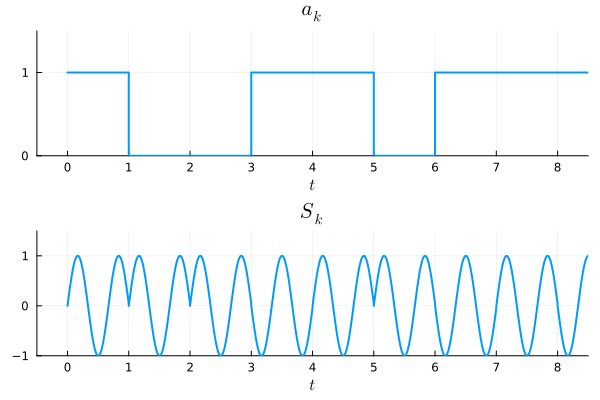

In [151]:
res = plot(p1, p2, layout=(2,1), legend=false)
# savefig(res, "../report/pics/bitsin.svg")


# Приемник

## Часть 1

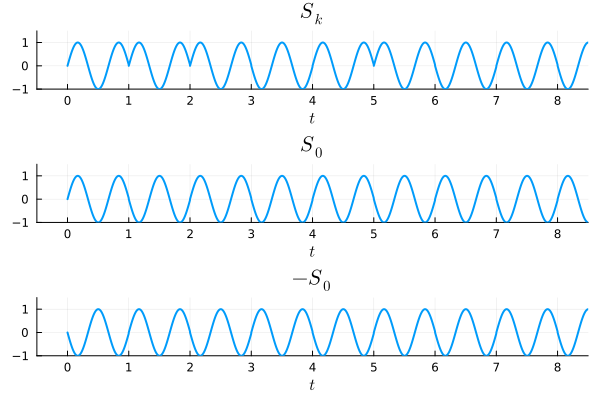

In [152]:
signal_nornal = Float64[]
signal_reverse = Float64[]

bits_normal = [1, 0, 1, 0, 1, 0, 1, 0, 1]

for bit in bits_normal
     if bit == 1
          append!(signal_nornal, sinusoid)
          append!(signal_reverse, reverse_sinusoid)
     else
          append!(signal_nornal, reverse_sinusoid)
          append!(signal_reverse, sinusoid)
     end
end


n_signal = range(0, stop=length(signal_nornal) / sample_rate, length=length(signal_nornal))
r_signal = range(0, stop=length(signal_reverse) / sample_rate, length=length(signal_reverse))

p3 = plot(n_signal, 
          signal_nornal, 
          linewidth=2, 
          xlabel="\$t\$", 
          title="\$S_0\$", 
          xlims=(-0.5, length(bits)-0.5), 
     ylims=(-1.0, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1)

p4 = plot(r_signal, 
          signal_reverse, 
          linewidth=2, 
          xlabel="\$t\$", 
          title="\$-S_0\$", 
          xlims=(-0.5, length(bits)-0.5), 
          ylims=(-1.0, 1.5), 
          xticks=0:length(bits)+1, 
          yticks=-1:1)

res2 = plot(p2, p3, p4, layout=(3,1), legend=false)
# savefig(res2, "../report/pics/rx1.svg")



## Часть 2

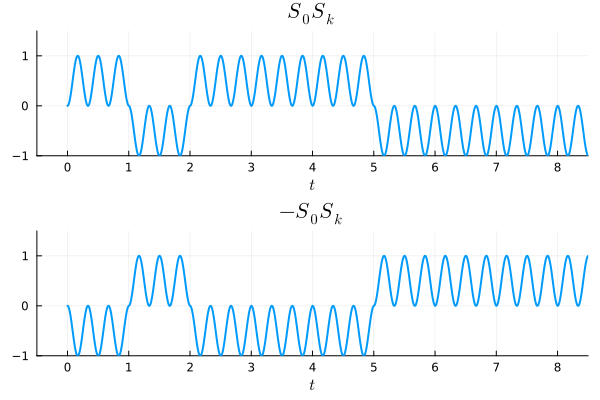

In [153]:
p5 = plot(t_signal, 
          signal .* signal_nornal, 
          linewidth=2, 
          xlabel="\$t\$", 
          title="\$S_{0} S_{k}\$", 
          xlims=(-0.5, length(bits)-0.5), 
     ylims=(-1.0, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1)

p6 = plot(t_signal, 
          signal .* signal_reverse, 
          linewidth=2, 
          xlabel="\$t\$", 
          title="\$-S_{0} S_{k}\$", 
          xlims=(-0.5, length(bits)-0.5), 
     ylims=(-1.0, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1)

rx2 = plot(p5, p6, layout=(2,1), legend=false)
# savefig(rx2, "../report/pics/rx2.svg")



Any[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9]Any[1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]

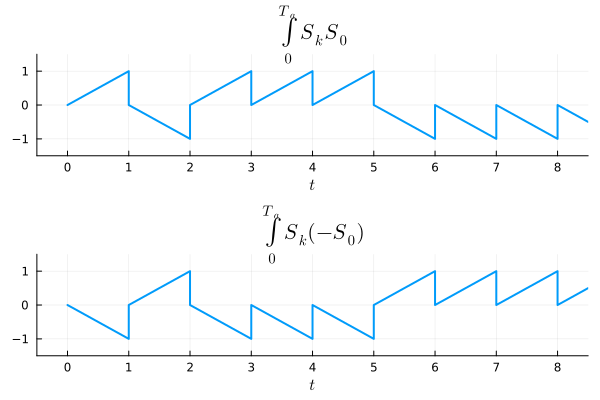

In [154]:
using Plots

# ХАРДКОД
bits = [1, 0, 1, 1, 1, 0, 0, 0, 0]

time = []
values_n = []
values_r = []

for (i, bit) in enumerate(bits)
    if bit == 1
        append!(time, [i-1, i])
        append!(values_n, [0, 1])
        append!(values_r, [0, -1])
    else
        append!(time, [i-1, i])
        append!(values_n, [0, -1])
        append!(values_r, [0, 1])

    end
end

print(time)
print(values)

p7 = plot(time,
     values_n, 
     linewidth=2, 
     xlabel="\$t\$", 
     title="\$\\int_0^{T_{a}} S_{k} S_{0} \$", 
     xlims=(-0.5, length(bits)-0.5), 
     ylims=(-1.5, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1)

p8 = plot(time,
     values_r, 
     linewidth=2, 
     xlabel="\$t\$", 
     title="\$\\int_0^{T_{a}} S_{k} (- S_{0}) \$",  
     xlims=(-0.5, length(bits)-0.5), 
     ylims=(-1.5, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=-1:1)

rx3 = plot(p7, p8, layout=(2,1), legend=false)

# savefig(rx3, "../report/pics/rx3.svg")



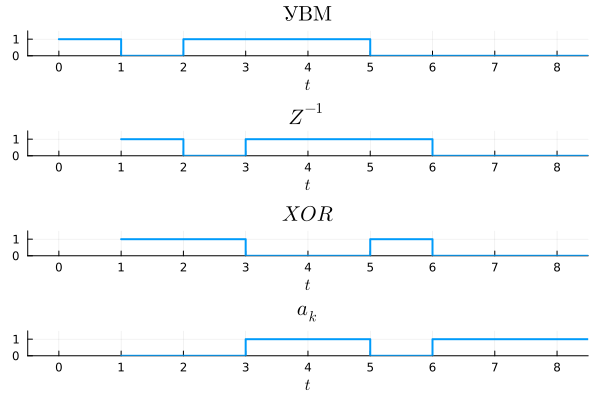

In [158]:
values = [ 1, 1, 0, 0, 1, 1, 1, 1 , 1, 1 , 0, 0, 0, 0, 0, 0, 0, 0]


yvm = plot(time,
     values, 
     linewidth=2, 
     line=:steppost, 
     xlabel="\$t\$", 
     title="\$УВМ\$", 
     xlims=(-0.5, length(bits)-0.5), 
     ylims=(0.0, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=0:1)

values = [ 0, 0, 1, 1, 0, 0 , 0, 0 , 0, 0, 1, 1, 1, 1, 1, 1]
values = [ 1, 1, 0, 0, 1, 1 , 1, 1 , 1, 1, 0, 0, 0, 0, 0, 0]

time =   [ 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9]
z= plot(time,
     values, 
     linewidth=2, 
     line=:steppost, 
     xlabel="\$t\$", 
     title="\$Z^{-1}\$", 
     xlims=(-0.5, length(bits)-0.5), 
     ylims=(0.0, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=0:1)

values = [ 1, 1, 1, 1, 0, 0 , 0, 0 , 1, 1, 0, 0, 0, 0, 0, 0]
time =   [ 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9]
xor = plot(time,
     values, 
     linewidth=2, 
     line=:steppost, 
     xlabel="\$t\$", 
     title="\$XOR\$", 
     xlims=(-0.5, length(bits)-0.5), 
     ylims=(0.0, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=0:1)

values = [ 0, 0, 0, 0, 1, 1 , 1, 1 , 0, 0, 1, 1, 1, 1, 1, 1]
time =   [ 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9]
bit = plot(time,
     values, 
     linewidth=2, 
     line=:steppost, 
     xlabel="\$t\$", 
     title="\$a_k\$", 
     xlims=(-0.5, length(bits)-0.5), 
     ylims=(0.0, 1.5), 
     xticks=0:length(bits)+1, 
     yticks=0:1)



rx45 = plot(yvm, z, xor, bit, layout=(4,1), legend=false)

# savefig(rx45, "../report/pics/rx45.svg")



## Вероятности ошибки

In [161]:
import Pkg; Pkg.add("QuadGK")

   Resolving package versions...


    Updating `~/.julia/environments/v1.9/Project.toml`
  [1fd47b50] + QuadGK v2.9.1
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


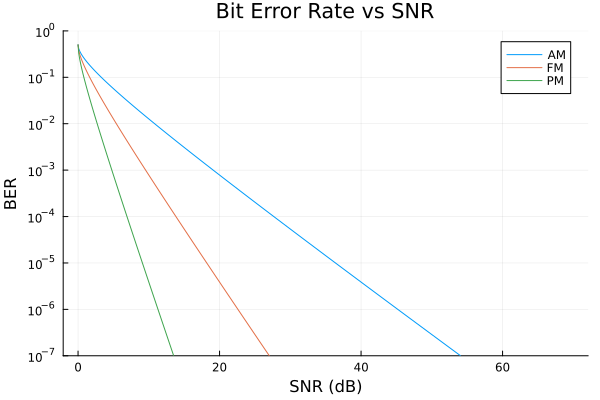

In [246]:
using QuadGK
using Plots

function q_function(x)
    f(t) = exp(-t^2 / 2)
    result, _ = quadgk(t -> f(t), x, Inf)
    return (1 / √(2π)) * result
end

function ber_am(snr_db)
    # snr_linear = 10 .^ (snr_db / 10)
    snr_linear = snr_db

    return q_function(sqrt(snr_linear / 2))
end

function ber_fm(snr_db)
    # snr_linear = 10 .^ (snr_db / 10)
    snr_linear = snr_db
    return q_function(sqrt(snr_linear))
end

function ber_pm(snr_db)
    # snr_linear = 10 .^ (snr_db / 10)
    snr_linear = snr_db

    return q_function(sqrt(2 * snr_linear))
end

snr_db_range = 0:0.1:70

desired_ber_range = 1e-6:1e-7:1e-4

snr_am = [snr_db for snr_db in snr_db_range if ber_am(snr_db) in desired_ber_range]
snr_fm = [snr_db for snr_db in snr_db_range if ber_fm(snr_db) in desired_ber_range]
snr_pm = [snr_db for snr_db in snr_db_range if ber_pm(snr_db) in desired_ber_range]

plot(snr_db_range, ber_am.(snr_db_range), label="AM", xlabel="SNR (dB)", ylabel="BER",
     title="Bit Error Rate vs SNR", yscale=:log10, legend=:topright, ylims=(1e-7, 1))
plot!(snr_db_range, ber_fm.(snr_db_range), label="FM", ylims=(1e-7, 1))
plot!(snr_db_range, ber_pm.(snr_db_range), label="PM", ylims=(1e-7, 1))

# savefig("../report/pics/errate.svg")


